## Capstone 1 Project: Prediction of Churn for Telecom Customers (Data Storytelling)

<font color='green'>
There are several questions I wanted to explore:<br>
    1. Are senior citizen likely to have longer tenue?  Are they less likely to churn?<br>
    2. Does gender play a role in likelihood to churn?<br>
    3. What kind of services do the customers that churn subscribe to?<br>
    4. Do customers with higher monthly charges tend to churn more frequently?<br>
    5. Is there a difference in the types of contracts that churning and non-churning customers prefer?<br>
    
</font>

In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

csvfile = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'

churn_df = pd.read_csv(csvfile)

churn_df.TotalCharges = pd.to_numeric(churn_df.TotalCharges, errors='coerce')
null_list = churn_df[churn_df['TotalCharges'].isnull()].index.tolist()
churn_df = churn_df.dropna()

plt.style.use('ggplot')

In [2]:
churn_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [3]:
churn_df[churn_df.Churn == 'Yes'].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,1869.000000,1869.000000,1869.000000,1869.000000
mean,0.254682,17.979133,74.441332,1531.796094
std,0.435799,19.531123,24.666053,1890.822994
min,0.000000,1.000000,18.850000,18.850000
25%,0.000000,2.000000,56.150000,134.500000
50%,0.000000,10.000000,79.650000,703.550000
75%,1.000000,29.000000,94.200000,2331.300000
max,1.000000,72.000000,118.350000,8684.800000


In [4]:
churn_df[churn_df.Churn == 'No'].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5163.000000,5163.00000,5163.000000,5163.000000
mean,0.128995,37.65001,61.307408,2555.344141
std,0.335227,24.07694,31.094557,2329.456984
min,0.000000,1.00000,18.250000,18.800000
25%,0.000000,15.00000,25.100000,577.825000
50%,0.000000,38.00000,64.450000,1683.600000
75%,0.000000,61.00000,88.475000,4264.125000
max,1.000000,72.00000,118.750000,8672.450000


<font color='green'>
1. Are senior citizen likely to have longer tenue?  Are they less likely to churn?
</font>

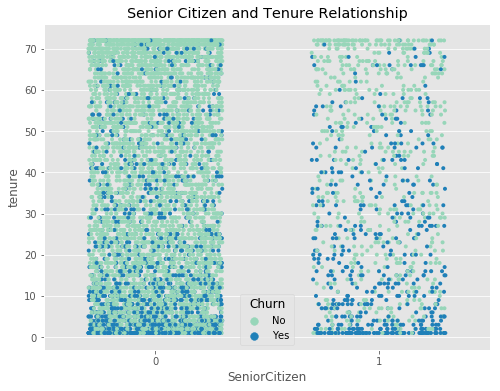

In [5]:
# strip plot of senior citizen and tenure relationship with hue = churn
_ = plt.figure(figsize=(8, 6))
_ = sns.stripplot(x="SeniorCitizen", y="tenure", jitter=.3, data=churn_df, hue='Churn', size=4, palette='YlGnBu')
_ = plt.title('Senior Citizen and Tenure Relationship')
plt.show()

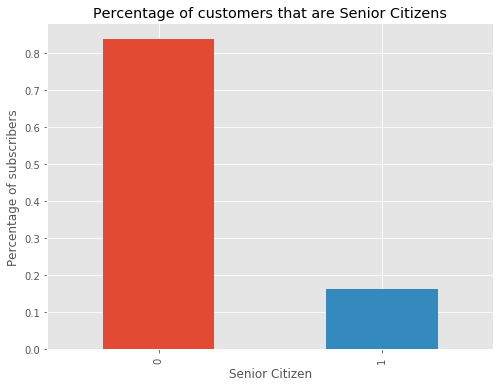

In [6]:
# percentage of subscribers that are senior citizens
_ = plt.figure(figsize=(8, 6))
_ = churn_df['SeniorCitizen'].value_counts('0').plot(kind='bar')
_ = plt.title('Percentage of customers that are Senior Citizens')
_ = plt.xlabel('Senior Citizen')
_ = plt.ylabel('Percentage of subscribers')
plt.show()

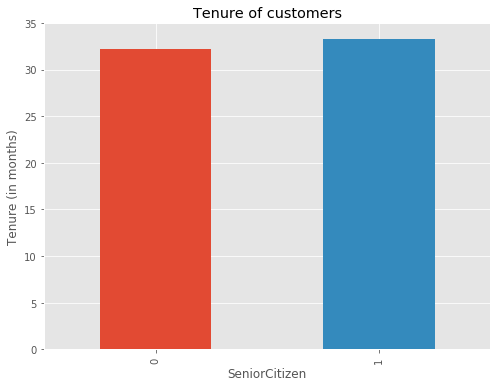

In [7]:
# average tenure of senior citizens vs non-senior citizens
_ = plt.figure(figsize=(8, 6))
_ = churn_df.groupby('SeniorCitizen')['tenure'].mean().plot(kind='bar')
_ = plt.title('Tenure of customers')
_ = plt.ylabel('Tenure (in months)')
plt.show()

In [8]:
churn_df.groupby('SeniorCitizen').describe()

MonthlyCharges                                              \
                       count       mean        std    min    25%     50%   
SeniorCitizen                                                              
0                     5890.0  61.885594  30.315567  18.25  25.60  65.875   
1                     1142.0  79.820359  23.764027  18.95  70.15  84.850   

                               TotalCharges               ...              \
                   75%     max        count         mean  ...         75%   
SeniorCitizen                                             ...               
0              86.7875  118.75       5890.0  2181.089550  ...   3566.3625   
1              98.0750  117.45       1142.0  2810.465193  ...   4600.3125   

                       tenure                                               \
                  max   count       mean        std  min   25%   50%   75%   
SeniorCitizen                                                                
0              8684.8  5890.0  32.252292  24.612263  1.0   9.0  28.0  55.0   
1              8443.7  1142.0  33.295972  24.188530  1.0  10.0  31.0  56.0   

                     
                max  
SeniorCitizen        
0              72.0  
1              72.0  

[2 rows x 24 columns]

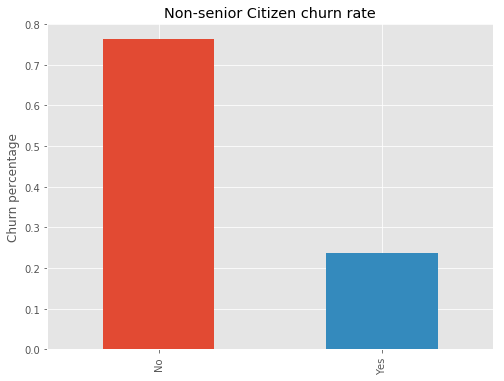

Non-senior citizen churn rates:
No     0.763497
Yes    0.236503
Name: Churn, dtype: float64


In [9]:
# percentage of non-senior citizens that churn
_ = plt.figure(figsize=(8, 6))
_ = churn_df['Churn'][churn_df['SeniorCitizen']==0].value_counts('Yes').plot(kind='bar')
_ = plt.title('Non-senior Citizen churn rate')
_ = plt.ylabel('Churn percentage')
plt.show()

print('Non-senior citizen churn rates:')
print(churn_df['Churn'][churn_df['SeniorCitizen']==0].value_counts('Yes'))

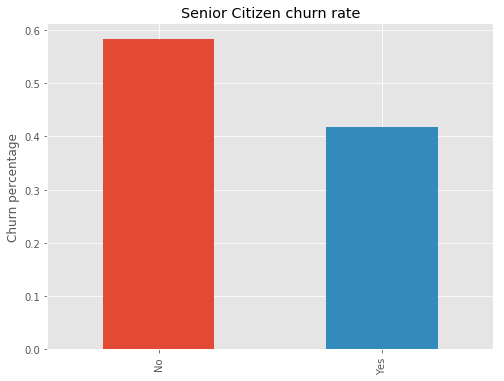

Senior Citizen churn rate:
No     0.583187
Yes    0.416813
Name: Churn, dtype: float64


In [10]:
# percentage of senior citizens that churn
_ = plt.figure(figsize=(8, 6))
_ = churn_df['Churn'][churn_df['SeniorCitizen']==1].value_counts('Yes').plot(kind='bar')
_ = plt.title('Senior Citizen churn rate')
_ = plt.ylabel('Churn percentage')
plt.show()

print('Senior Citizen churn rate:')
print(churn_df['Churn'][churn_df['SeniorCitizen']==1].value_counts('Yes'))

<font color='blue'>
It appears that senior citizens have around the same tenure length as non-senior citizens (non-senior: 32.25 mo, senior: 33.3 mo).  While senior citizens only account for 16% of the subscriber base, they churn at a much higher rate than non-senior citizens (41.7% churn for senior citizens vs 23.7% churn for non-senior citizens)
</font>

<font color='green'>
2. Does gender play a role in likelihood to churn?
</font>

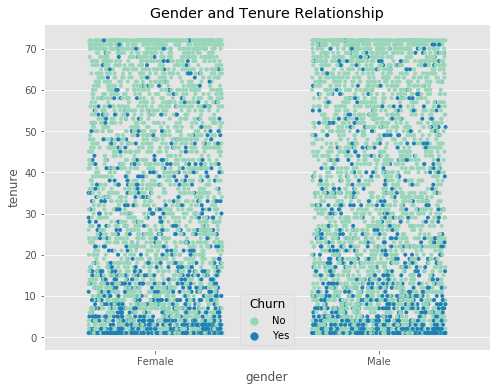

In [11]:
_ = plt.figure(figsize=(8, 6))
_ = sns.stripplot(x="gender", y="tenure", jitter=.3, data=churn_df, hue='Churn', size=4, palette='YlGnBu')
_ = plt.title('Gender and Tenure Relationship')
plt.show()

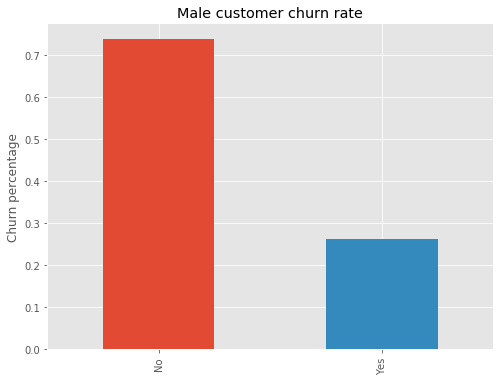

No     0.737954
Yes    0.262046
Name: Churn, dtype: float64

In [12]:
# percentage of male subscribers that churn
_ = plt.figure(figsize=(8, 6))
_ = churn_df['Churn'][churn_df['gender']=='Male'].value_counts('Yes').plot(kind='bar')
_ = plt.title('Male customer churn rate')
_ = plt.ylabel('Churn percentage')
plt.show()

churn_df['Churn'][churn_df['gender']=='Male'].value_counts('Yes')

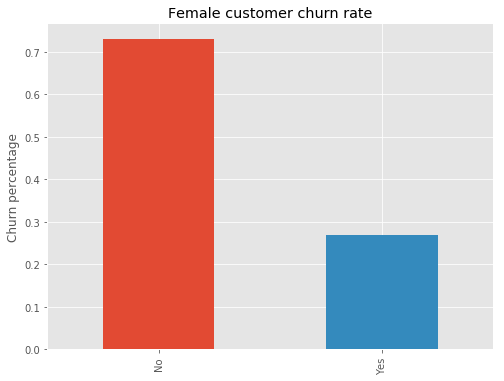

No     0.730405
Yes    0.269595
Name: Churn, dtype: float64

In [13]:
# percentage of female subscribers that churn
_ = plt.figure(figsize=(8, 6))
_ = churn_df['Churn'][churn_df['gender']=='Female'].value_counts('Yes').plot(kind='bar')
_ = plt.title('Female customer churn rate')
_ = plt.ylabel('Churn percentage')
plt.show()

churn_df['Churn'][churn_df['gender']=='Female'].value_counts('Yes')

<font color='blue'>
Both female and male subscribers have a similar churn rate of approx 26%.
</font>

<font color='green'>
3. What kind of services do the customers that churn subscribe to?
</font>

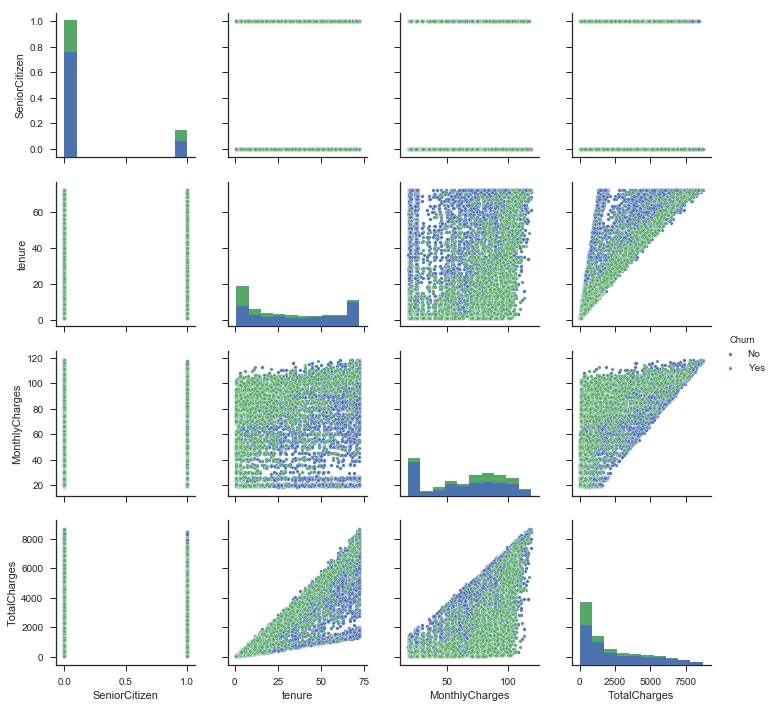

In [14]:
sns.set(style="ticks")

sns.pairplot(churn_df, hue="Churn", markers='.')

Text(0.5,1,'Online Backup Service')

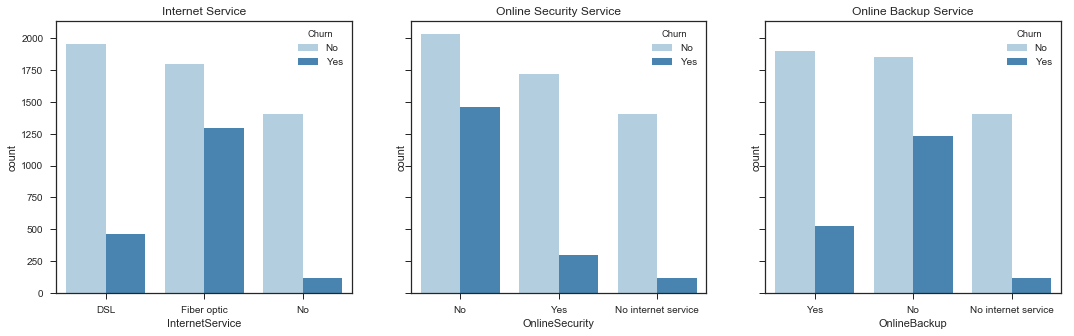

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(18,5))

sns.countplot(x='InternetService', hue='Churn', data=churn_df, palette='Blues', ax=ax1).set_title('Internet Service')

sns.countplot(x='OnlineSecurity', hue='Churn', data=churn_df, palette='Blues', ax=ax2).set_title('Online Security Service')

sns.countplot(x='OnlineBackup', hue='Churn', data=churn_df, palette='Blues', ax=ax3).set_title('Online Backup Service')

Text(0.5,1,'Streaming Movie Service')

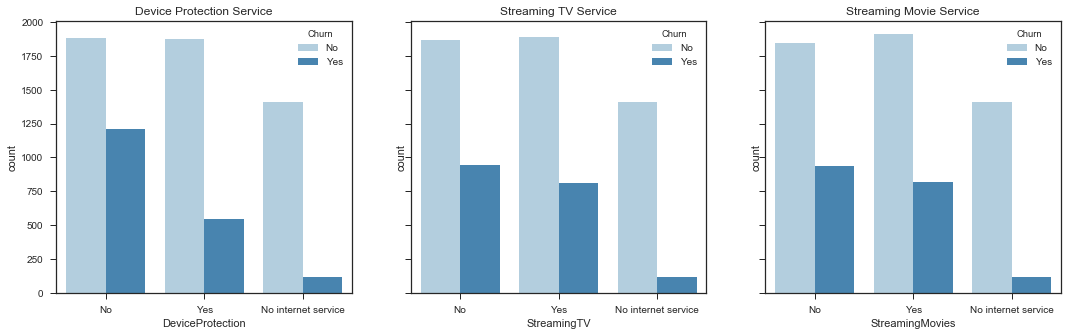

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(18,5))

sns.countplot(x='DeviceProtection', hue='Churn', data=churn_df, palette='Blues', ax=ax1).set_title('Device Protection Service')

sns.countplot(x='StreamingTV', hue='Churn', data=churn_df, palette='Blues', ax=ax2).set_title('Streaming TV Service')

sns.countplot(x='StreamingMovies', hue='Churn', data=churn_df, palette='Blues', ax=ax3).set_title('Streaming Movie Service')

Text(0.5,1,'Payment methods')

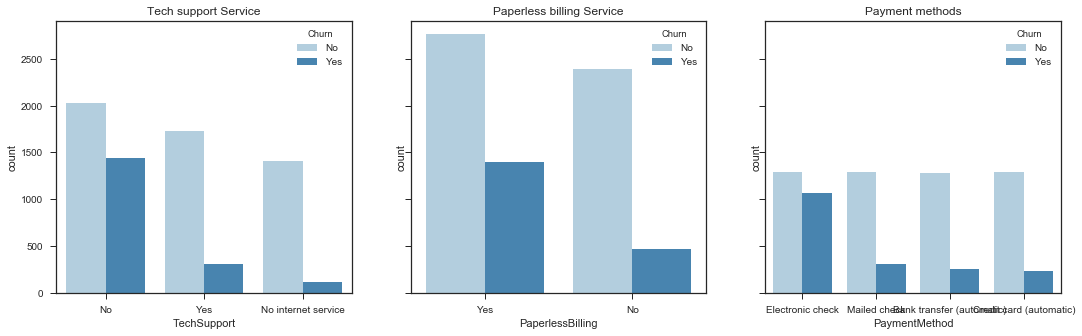

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(18,5))

sns.countplot(x='TechSupport', hue='Churn', data=churn_df, palette='Blues', ax=ax1).set_title('Tech support Service')

sns.countplot(x='PaperlessBilling', hue='Churn', data=churn_df, palette='Blues', ax=ax2).set_title('Paperless billing Service')

sns.countplot(x='PaymentMethod', hue='Churn', data=churn_df, palette='Blues', ax=ax3).set_title('Payment methods')

<font color='blue'>
Comparing churn and non-churn customers, we discover several interesting things:<br>
    1. The primary service that churn customers are subscribing to is fiber internet service.<br>
    2. Non-churn customers are much more likely to sign up for optional services such as online security, online backup, device protection and tech support than churn customers.<br>
    3. Churn customers overwhelmingly prefer paying by electronic check compared to all other payments options.
</font>

<font color='green'>
4. Do customers with higher monthly charges tend to churn more frequently?
</font>

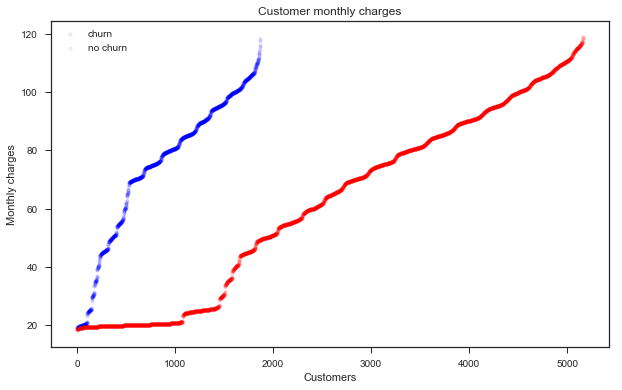

In [18]:
df_sort = churn_df.sort_values('MonthlyCharges')
churn_df_sort = df_sort[df_sort.Churn == 'Yes']
nochurn_df_sort = df_sort[df_sort.Churn == 'No']

fig = plt.figure(figsize=(10, 6))
_ = plt.scatter(x=range(len(churn_df_sort.MonthlyCharges)), y="MonthlyCharges", c='blue', marker='.', data=churn_df_sort, alpha=.1, label='churn')
_ = plt.scatter(x=range(len(nochurn_df_sort.MonthlyCharges)), y="MonthlyCharges", c='red', marker='.', data=nochurn_df_sort, alpha=.1, label='no churn')
_ = plt.xlabel('Customers')
_ = plt.ylabel('Monthly charges')
_ = plt.legend()
_ = plt.title('Customer monthly charges')
plt.show()

In [19]:
# churn customer monthly charge average and standard dev 
print('Churn customers average monthly charge:', churn_df_sort.MonthlyCharges.mean())
print('Churn customers monthly charge standard dev:', churn_df_sort.MonthlyCharges.std())

Churn customers average monthly charge: 74.44133226324249
Churn customers monthly charge standard dev: 24.666053259397437


In [20]:
# churn customer monthly charge average and standard dev 
print('Non-churn customers average monthly charge:', nochurn_df_sort.MonthlyCharges.mean())
print('Non-churn customers monthly charge standard dev:', nochurn_df_sort.MonthlyCharges.std())

Non-churn customers average monthly charge: 61.30740848343981
Non-churn customers monthly charge standard dev: 31.094556906672597


<font color='blue'>
Non-churning customers have a higher average monthly fees than non-churn customers.
</font>

<font color='green'>
5. Is there a difference in the types of contracts that churning and non-churning customers prefer?
</font>

Text(0.5,1,'Contracts of churn and non-churn customers')

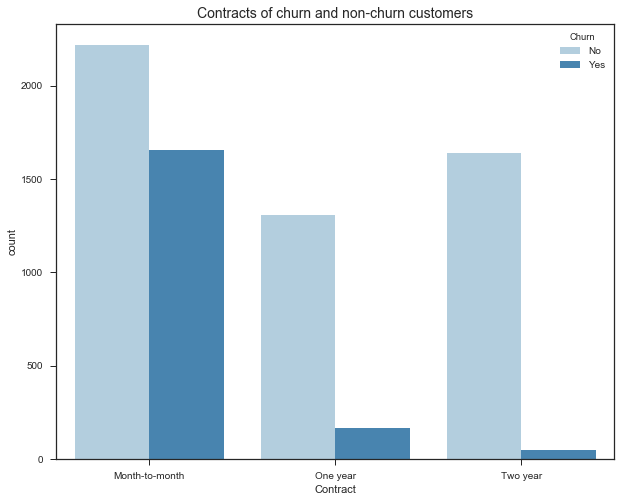

In [21]:
fig = plt.figure(figsize=(10, 8))
sns.countplot(x='Contract', hue='Churn', data=churn_df, palette='Blues')
plt.title('Contracts of churn and non-churn customers', fontsize = 14)

In [22]:
# percentage of each contract for churning customers
churn_df['Contract'][churn_df['Churn']=='Yes'].value_counts('Yes')

Month-to-month    0.885500
One year          0.088818
Two year          0.025682
Name: Contract, dtype: float64

In [23]:
# percentage of each contract for non-churning customers
churn_df['Contract'][churn_df['Churn']=='No'].value_counts('Yes')

Month-to-month    0.429983
Two year          0.317064
One year          0.252954
Name: Contract, dtype: float64

<font color='blue'>
Churning customers are overwhelmingly using month-to-month contracts.  Month-to-month contracts account for over 88% of the contract type for churning customers compared to 43% for non-churning customers.
</font>